In [1]:
# !pip install spotipy

     |████████████████████████████████| 62 kB 3.5 MB/s  eta 0:00:01
     |████████████████████████████████| 138 kB 64.0 MB/s eta 0:00:01
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.25.11
    Uninstalling urllib3-1.25.11:
      Successfully uninstalled urllib3-1.25.11
  Attempting uninstall: requests
    Found existing installation: requests 2.11.1
    Uninstalling requests-2.11.1:
      Successfully uninstalled requests-2.11.1
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

two1 3.10.9 requires mnemonic==0.13, but you'll have mnemonic 0.18 which is incompatible.
two1 3.10.9 requires protobuf==3.0.0a3, but you'll have protobuf 3.6.1 which is incompatible.
two1 3.10.9 requires requests<=2.11.1, but you'll have requ

In [58]:
import numpy as np
import pandas as pd
import sys
import spotipy
import spotipy.util as util
import collections
# %matplotlib notebook
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import time

# Data Imports from Spotify Web API

In [2]:
# configuring token

SPOTIPY_CLIENT_ID="70c49e55eae64f0a82b313830c6cebf3"
SPOTIPY_CLIENT_SECRET="cb5063c70a514acebca3481a37f15e01"
SPOTIPY_REDIRECT_URI = "http://localhost"
username='axw2001d'
scope="playlist-read-private"
token = util.prompt_for_user_token(username, 
                                   scope, 
                                   client_id=SPOTIPY_CLIENT_ID, 
                                   client_secret=SPOTIPY_CLIENT_SECRET, 
                                   redirect_uri=SPOTIPY_REDIRECT_URI
                                  )

In [3]:
def getUserPlaylists(username, token):
    if token: 
        sp = spotipy.Spotify(auth=token)
        results = sp.user_playlists(username)
        
        names = [playlist['name'] for playlist in results['items']]
        ids = [playlist['id'] for playlist in results['items']]
        return pd.DataFrame({'Playlist Name': names, 'Playlist ID': ids})
    
    else:
        return ("Can't get token")
    
albertPlaylists = getUserPlaylists(username, token)
albertPlaylists

,Playlist Name,Playlist ID
0,chill,0NZG7wQb2vYcZnDbXVhI0c
1,David + Albert,37i9dQZF1EJKaeFMaOl8eI
2,Meghan + Albert,37i9dQZF1EJLS65dwlarfG
3,Two Less Lonely People In the World,1YBSpcRT0vfkMxqQ0cxr99
4,headspace✨,3YYwXXquXYH1pKrC1gf29z
5,lofi hip hop music - beats to relax/study to,0vvXsWCC9xrXsKd4FyS8kM
6,Your Top Songs 2020,37i9dQZF1ELZnfvzQqAiOM
7,Songs I wanna learn,3uYQUUyYNeBgGY6Vz7Tydn
8,Blues Guitar Instrumentals,3a54WQYSUPwjgGmfd4JIII
9,for the fences,3PZOaNpq2B9vphKihSoW2D


In [10]:
def getPlaylistSongs(username, playlistName, token):
    
    playlist = getUserPlaylists(username, token)
    playlistID = list(playlist[playlist['Playlist Name'] == playlistName]['Playlist ID'])[0]
    
    features_list = ["artist", "album", "album_release_date", "track_name", "track_id", 
                         "explicit", "popularity", "danceability", "energy", "key", 
                         "loudness", "mode", "speechiness","instrumentalness","liveness",
                         "valence","tempo", "duration_ms","time_signature"]
    df = pd.DataFrame(columns = features_list[:7])
    
    if token:
        sp = spotipy.Spotify(auth=token)
        results = sp.user_playlist_tracks(username, playlistID, limit=70)
        tracks = results['items']
        
        while results['next']:
            results = sp.next(results)
            tracks.extend(results['items'])
        
        for item in tracks:
            track = item['track']
            if track == None or track['id'] == None:
                continue
            features = {}
            
            # get metadata
            features['added_time'] = item['added_at']
            if len(track['album']['artists']) > 0:
                features['artist'] = track['album']['artists'][0]['name']
            else: 
                features['artist'] = None
            features['album_release_date'] = track['album']['release_date']
            features['album'] = track['album']['name']
            features['track_name'] = track['name']
            features['track_id'] = track['id']
            features['explicit'] = track['explicit']
            features['popularity'] = track['popularity']
            
            # concat dataframes
            track_df = pd.DataFrame(features, index=[0])
            df = pd.concat([df, track_df], ignore_index=True)
            
        track_ids = df['track_id']
        audio_features = []
        while len(track_ids) > 100:
            audio_features += sp.audio_features(','.join(track_ids[0:100]))
            track_ids = track_ids[100:]
        audio_features += sp.audio_features(','.join(track_ids))
        
        for feature in features_list[7:]:
            df[feature] = [track[feature] for track in audio_features]
        
        return df
    else:
        return ("Can't get token for", username)

In [26]:
playlistSongs = getPlaylistSongs(username, "DROP DROP UZI", token)
playlistSongs

,artist,album,album_release_date,track_name,track_id,explicit,popularity,added_time,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,HoodRich Pablo Juan,Zambamafoo,2017-07-31,Zambamafoo,3UMpcCyG1Dj0yDb377vu2K,True,46,2018-06-17T16:01:36Z,0.886,0.644,1,-9.284,1,0.2840,0.000000,0.161,0.6640,119.992,173493,4
1,Various Artists,DJ Worldtour,2016-09-02,That's My Rule (Intro) [feat. Lil Uzi Vert],3x4KIuoye6F12loCFckCX3,True,0,2018-06-17T16:01:53Z,0.908,0.695,8,-7.100,1,0.2690,0.000000,0.270,0.5430,144.026,166792,4
2,Trippie Redd,A Love Letter To You 2,2017-10-06,Woah Woah Woah,70NxaxjB8IjX4YxXbT90iX,True,48,2018-06-17T16:02:03Z,0.617,0.773,0,-4.793,1,0.0397,0.000000,0.204,0.2420,149.006,222288,4
3,Lil Uzi Vert,Luv Is Rage 2,2017-08-25,For Real,3tcoEYOZUHKB3RKNByIN13,True,58,2018-06-17T16:02:13Z,0.902,0.673,4,-7.481,1,0.4580,0.000000,0.289,0.6150,132.066,177048,4
4,Sheck Wes,Mo Bamba,2017-09-19,Mo Bamba,3QybPutx0Tjk472bBKjNWn,True,0,2018-06-20T09:39:17Z,0.738,0.629,6,-4.882,0,0.0495,0.001140,0.163,0.3190,146.067,180898,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,Remble,Rocc Climbing (feat. Lil Yachty),2021-09-24,Rocc Climbing (feat. Lil Yachty),5bBzkJE9BqYTL27webAUCw,True,69,2021-09-28T00:03:12Z,0.832,0.656,4,-7.492,0,0.3750,0.000002,0.108,0.5620,100.032,175878,4
1488,Drake,Certified Lover Boy,2021-09-03,N 2 Deep,34D6FJysnQioVingDKufuf,True,82,2021-10-02T20:51:07Z,0.507,0.429,2,-7.726,1,0.3260,0.000000,0.109,0.0744,91.000,273578,3
1489,Nardo Wick,"Who Want Smoke?? (feat. G Herbo, Lil Durk & 21...",2021-10-08,"Who Want Smoke?? (feat. G Herbo, Lil Durk & 21...",4yNoUQkYf1QF8iYlEzNynH,True,80,2021-10-11T22:57:49Z,0.739,0.740,5,-5.860,0,0.3330,0.000000,0.161,0.4880,75.575,279853,4
1490,The Kid LAROI,F*CK LOVE 3+: OVER YOU,2021-07-27,ATTENTION,5JrljwNvTFN6y7b5a5Nzq7,True,64,2021-10-21T18:20:35Z,0.878,0.583,8,-7.053,1,0.0729,0.000000,0.393,0.3200,132.939,104525,4


In [5]:
import os
os.getcwd()

'/Users/albertwen/GitHub/calhacks2021'

In [107]:
# playlistSongs.to_csv("diverseTestPlaylist.csv.gz", compression='gzip')

# TSNE

In [62]:
def cleanData(df):
    
    # getting only month of release date and added time
    df['album_release_date'] = df['album_release_date'].str.slice(0, 4)
    df['added_time'] = df['added_time'].str.slice(0, 4)
    
    # setting index and dropping irrelevant columns
    df.index = df['track_id']
    df = df.drop(['artist', 'album', 'track_name', 'track_id'], axis=1)
        
    # add a few columns as categorical features
    df['key'] = df['key'].astype(str)
    df['mode'] = df['mode'].astype(str)
    df['time_signature'] = df['time_signature'].astype(str)
    df['popularity'] = df['popularity'].astype(int)
        
    # getting dummies
    df = pd.get_dummies(df)
        
    # normalization
    columns_to_normalize = ['popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
    for column in columns_to_normalize:
        df[column] = (df[column] - df[column].mean()) / df[column].std()
    
    return df

# def generate_TSNE(path: str):
#     df = pd.read_csv(path).iloc[:, 1:]
#     normed_df = cleanData(df)
    
#     # np.random.seed(42)
#     time_start = time.time()
#     tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
#     tsne_results = tsne.fit_transform(normed_df)
#     print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

#     normed_df['tsne-one'] = tsne_results[:,0]
#     normed_df['tsne-two'] = tsne_results[:,1]
#     normed_df['tsne-three'] = tsne_results[:,2]
    
#     return normed_df

def generate_TSNE(df: pd.DataFrame()):
    normed_df = cleanData(df)
    
    # np.random.seed(42)
    time_start = time.time()
    tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
    tsne_results = tsne.fit_transform(normed_df)
    print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

    normed_df['tsne-one'] = tsne_results[:,0]
    normed_df['tsne-two'] = tsne_results[:,1]
    normed_df['tsne-three'] = tsne_results[:,2]
    
    return normed_df

In [53]:
# generate_TSNE('largeTestPlaylist.csv.gz')

In [63]:
test = generate_TSNE(playlistSongs)
test

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1492 samples in 0.003s...
[t-SNE] Computed neighbors for 1492 samples in 0.175s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1492
[t-SNE] Computed conditional probabilities for sample 1492 / 1492
[t-SNE] Mean sigma: 1.201605
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.704094
[t-SNE] KL divergence after 300 iterations: 1.854225
t-SNE done! Time elapsed: 3.4527900218963623 seconds


,popularity,danceability,energy,loudness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,...,key_9,mode_0,mode_1,time_signature_1,time_signature_3,time_signature_4,time_signature_5,tsne-one,tsne-two,tsne-three
track_id,,,,,,,,,,,,,,,,,,,,,
3UMpcCyG1Dj0yDb377vu2K,-0.411625,1.031632,0.236760,-1.270728,0.548203,-0.107155,-0.143672,0.993401,-0.256277,-0.456853,...,0,0,1,0,0,1,0,2.960882,-4.224900,7.107244
3x4KIuoye6F12loCFckCX3,-2.715544,1.207490,0.638946,-0.222696,0.437593,-0.107155,0.723963,0.421131,0.591164,-0.598435,...,0,0,1,0,0,1,0,-4.269281,-7.220874,-5.541105
70NxaxjB8IjX4YxXbT90iX,-0.311455,-1.118629,1.254055,0.884360,-1.253266,-0.107155,0.198606,-1.002449,0.766759,0.574108,...,0,0,1,0,0,1,0,-4.614830,6.467584,0.084922
3tcoEYOZUHKB3RKNByIN13,0.189397,1.159529,0.465454,-0.405525,1.831280,-0.107155,0.875202,0.761656,0.169453,-0.381742,...,0,0,1,0,0,1,0,2.991468,-4.220759,7.083348
3QybPutx0Tjk472bBKjNWn,-2.715544,-0.151411,0.118470,0.841652,-1.181001,-0.075159,-0.127752,-0.638277,0.663130,-0.300397,...,0,1,0,0,0,1,0,-3.274334,-6.046809,-7.167195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5bBzkJE9BqYTL27webAUCw,0.740334,0.599981,0.331392,-0.410804,1.219238,-0.107095,-0.565549,0.510992,-0.960068,-0.406462,...,0,1,0,0,0,1,0,-0.014213,-2.233550,1.953262
34D6FJysnQioVingDKufuf,1.391442,-1.997918,-1.458732,-0.523093,0.857912,-0.107155,-0.557589,-1.795114,-1.278537,1.657784,...,0,0,1,0,1,0,0,-4.929469,5.696754,-5.640442
4yNoUQkYf1QF8iYlEzNynH,1.291272,-0.143418,0.993817,0.372341,0.909530,-0.107155,-0.143672,0.161009,-1.822424,1.790365,...,0,1,0,0,0,1,0,-0.497367,-2.260898,2.311563


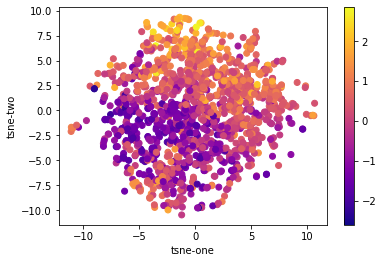

In [64]:
# 2d

fig = plt.figure()
ax = fig.add_subplot()
p = ax.scatter(
    x=test["tsne-one"], 
    y=test["tsne-two"], 
#     zs=largeData["tsne-three"], 
    c=test['tempo'],
    cmap='plasma')

ax.set_xlabel('tsne-one')
ax.set_ylabel('tsne-two')
# ax.set_zlabel('tsne-three')
fig.colorbar(p)
plt.show()

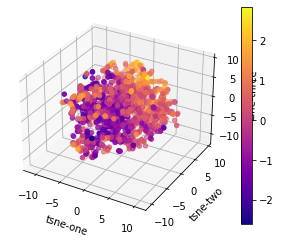

In [65]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
p = ax.scatter(
    xs=test["tsne-one"], 
    ys=test["tsne-two"], 
    zs=test["tsne-three"], 
    c=test['tempo'],
    cmap='plasma')

ax.set_xlabel('tsne-one')
ax.set_ylabel('tsne-two')
ax.set_zlabel('tsne-three')
fig.colorbar(p)
plt.show()

<IPython.core.display.Javascript object>


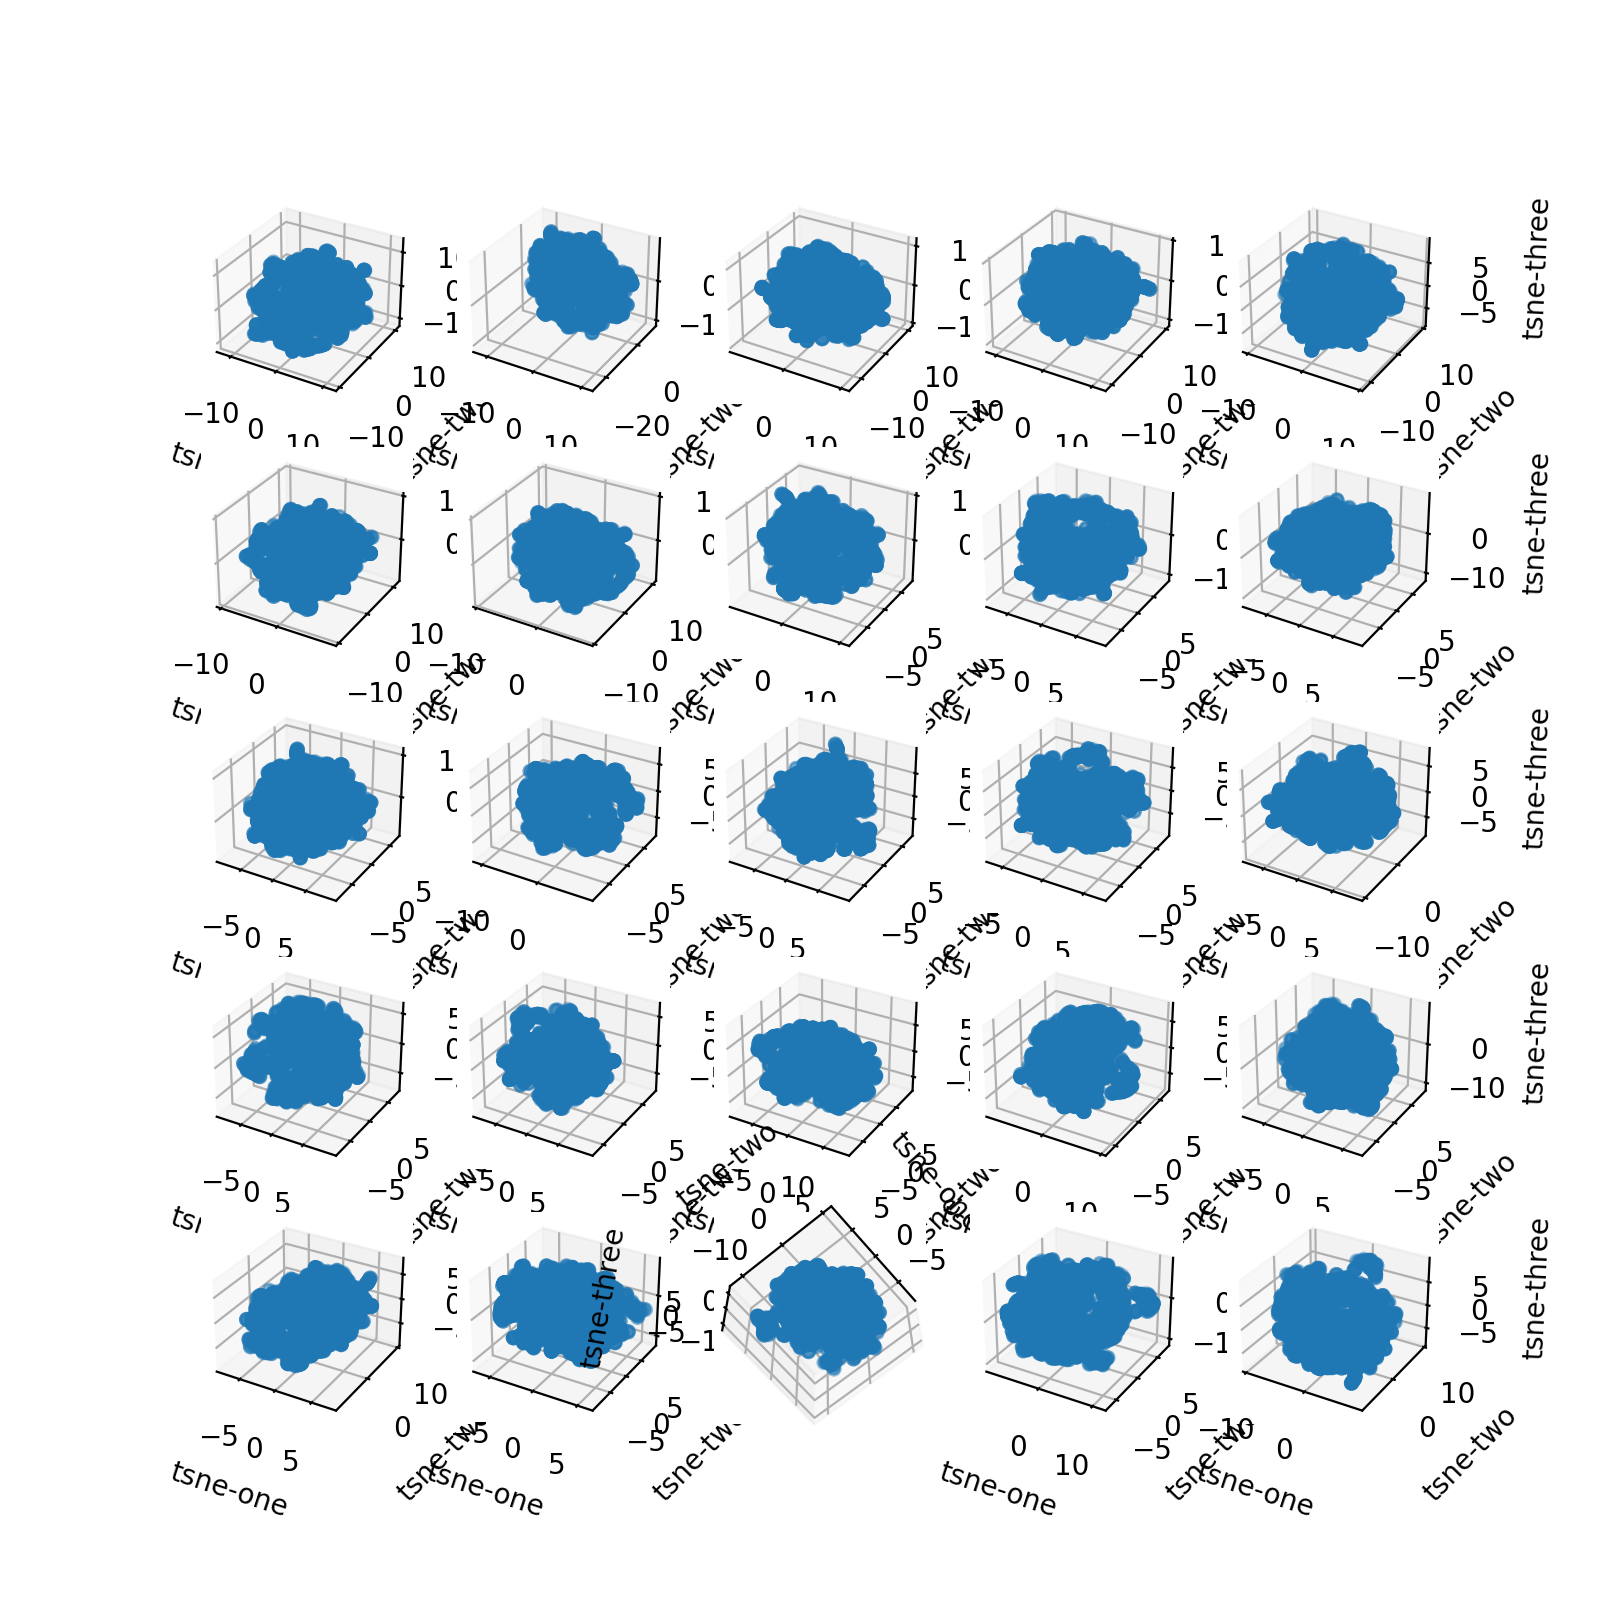

In [123]:
# fig, ax = plt.subplots(5, 5)
fig, axs = plt.subplots(5,5,figsize=(8,8), subplot_kw=dict(projection='3d'))

increment = (90 - 20) / 25
perp = 20
for i, ax in enumerate(axs.flat):
    tsne = TSNE(n_components=3, perplexity=perp, n_iter=300)
    tsne_results = tsne.fit_transform(largeData)
    t1 = tsne_results[:,0]
    t2 = tsne_results[:,1]
    t3 = tsne_results[:,2]
    ax.scatter(xs = t1, ys = t2, zs = t3, cmap='tab10')
    ax.set_xlabel('tsne-one')
    ax.set_ylabel('tsne-two')
    ax.set_zlabel('tsne-three')
    perp += increment

plt.show()

## old shit

In [41]:
len(albertSongs['track_id'].unique())

60

In [37]:
albertSongs.shape

(90, 19)

In [41]:
# pd.DataFrame(pd.json_normalize(track))

,artists,available_markets,disc_number,duration_ms,explicit,href,id,is_local,name,popularity,...,album.id,album.images,album.name,album.release_date,album.release_date_precision,album.total_tracks,album.type,album.uri,external_ids.isrc,external_urls.spotify
0,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,161146,False,https://api.spotify.com/v1/tracks/0zaoWwS8RpE3...,0zaoWwS8RpE3LSDdmkg8TC,False,In The Dark (with Jhené Aiko),65,...,2kAqjStKcwlDD59H0llhGC,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Shang-Chi and The Legend of The Ten Rings: The...,2021-09-03,day,18,album,spotify:album:2kAqjStKcwlDD59H0llhGC,USUM72113050,https://open.spotify.com/track/0zaoWwS8RpE3LSD...


In [52]:
# track.keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track_number', 'type', 'uri'])

In [57]:
# track

{'album': {'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1AhjOkOLkbHUfcHDSErXQs'},
    'href': 'https://api.spotify.com/v1/artists/1AhjOkOLkbHUfcHDSErXQs',
    'id': '1AhjOkOLkbHUfcHDSErXQs',
    'name': '88rising',
    'type': 'artist',
    'uri': 'spotify:artist:1AhjOkOLkbHUfcHDSErXQs'},
   {'external_urls': {'spotify': 'https://open.spotify.com/artist/2kxP07DLgs4xlWz8YHlvfh'},
    'href': 'https://api.spotify.com/v1/artists/2kxP07DLgs4xlWz8YHlvfh',
    'id': '2kxP07DLgs4xlWz8YHlvfh',
    'name': 'NIKI',
    'type': 'artist',
    'uri': 'spotify:artist:2kxP07DLgs4xlWz8YHlvfh'},
   {'external_urls': {'spotify': 'https://open.spotify.com/artist/540vIaP2JwjQb9dm3aArA4'},
    'href': 'https://api.spotify.com/v1/artists/540vIaP2JwjQb9dm3aArA4',
    'id': '540vIaP2JwjQb9dm3aArA4',
    'name': 'DJ Snake',
    'type': 'artist',
    'uri': 'spotify:artist:540vIaP2JwjQb9dm3aArA4'}],
  'available_markets': ['AD',
   'AE',
   'AG',
   'AL',
 

In [ ]:
# def get_saved_songs(token):
    
#     features_list = ["artist", "album", "album_release_date", "track_name", "track_id", "explicit", "popularity", "danceability", "energy", "key", "loudness", "mode", "speechiness","instrumentalness","liveness","valence","tempo", "duration_ms","time_signature"]
#     df = pd.DataFrame(columns = features_list)
    
#     if token:
#         sp = spotipy.Spotify(auth=token)
# #         results = sp.current_user_saved_tracks()
#         results = sp.current_user_top_tracks(limit = 40, offset=0, time_range='long_term')
#         saved_songs = results['items']

# #         print(saved_songs[0], '\n')
# #         print(saved_songs[0].keys())
        
#         num_pages = 0
#         offset = 0
#         number = 30
#         while results['next']:
#             results = sp.current_user_top_tracks(limit=number, offset=offset, time_range='long_term')
#             offset += number
# #             results = sp.next(results)
#             saved_songs.extend(results['items'])
# #             num_pages += 1
        
#         for track in saved_songs:
#             features = {}
            
#             # get metadata
#             features['artist'] = track['album']['artists'][0]['name']
#             features['album_release_date'] = track['album']['release_date']
#             features['album'] = track['album']['name']
#             features['track_name'] = track['name']
#             features['track_id'] = track['id']
#             features['explicit'] = track['explicit']
#             features['popularity'] = track['popularity']
            
#             # get audio features
#             audio_features = sp.audio_features(features['track_id'])[0]
#             for feature in features_list[7:]: # this splice is hard coded, must update if changing features
#                 features[feature] = audio_features[feature]
            
#             # concat dataframes
#             track_df = pd.DataFrame(features, index=[0])
#             df = pd.concat([df, track_df], ignore_index=True)
            
#         return df
#     else:
#         return ("Can't get token for", username)

# albertSongs = get_saved_songs(token)
# albertSongs

In [67]:
import numpy as np
import pandas as pd
import spotipy
import spotipy.util as util
from sklearn.manifold import TSNE
import time


def main():
	# parse the inputs



	# configure token

	SPOTIPY_CLIENT_ID="70c49e55eae64f0a82b313830c6cebf3"
	SPOTIPY_CLIENT_SECRET="cb5063c70a514acebca3481a37f15e01"
	SPOTIPY_REDIRECT_URI = "http://localhost"
	username='axw2001d'
	scope="playlist-read-private"
	token = util.prompt_for_user_token(username, 
	                                   scope, 
	                                   client_id=SPOTIPY_CLIENT_ID, 
	                                   client_secret=SPOTIPY_CLIENT_SECRET, 
	                                   redirect_uri=SPOTIPY_REDIRECT_URI
	                                  )

	playlistID = '2NQemdvdAfjpxKymXLilBK' # test playlistID input
	playlistSongs = getPlaylistSongs(username, playlistID, token) # dataframe of the songs in playlistID
	data = generate_TSNE(playlistSongs) # adds three columns to prev df, with TSNE coords
	tsneCoords = data[['tsne-one', 'tsne-two', 'tsne-three']]
	return tsneCoords

# get the playlists for the username and token; can print this intermediately
# also gets the playlist IDs; might want dictionary of playlist name to playlistID

def getUserPlaylists(username, token):
    if token: 
        sp = spotipy.Spotify(auth=token)
        results = sp.user_playlists(username)
        
        names = [playlist['name'] for playlist in results['items']]
        ids = [playlist['id'] for playlist in results['items']]
        return pd.DataFrame({'Playlist Name': names, 'Playlist ID': ids})
    
    else:
        return ("Can't get token")
    

def getPlaylistSongs(username, playlistID, token):
    
    # playlist = getUserPlaylists(username, token)
    # playlistID = list(playlist[playlist['Playlist Name'] == playlistName]['Playlist ID'])[0]
    
    features_list = ["artist", "album", "album_release_date", "track_name", "track_id", 
                         "explicit", "popularity", "danceability", "energy", "key", 
                         "loudness", "mode", "speechiness","instrumentalness","liveness",
                         "valence","tempo", "duration_ms","time_signature"]
    df = pd.DataFrame(columns = features_list[:7])
    
    if token:
        sp = spotipy.Spotify(auth=token)
        results = sp.user_playlist_tracks(username, playlistID)
        tracks = results['items']
        
        while results['next']:
            results = sp.next(results)
            tracks.extend(results['items'])
        
        for item in tracks:
            track = item['track']
            if track == None or track['id'] == None:
                continue
            features = {}
            
            # get metadata
            features['added_time'] = item['added_at']
            if len(track['album']['artists']) > 0:
                features['artist'] = track['album']['artists'][0]['name']
            else: 
                features['artist'] = None
            features['album_release_date'] = track['album']['release_date']
            features['album'] = track['album']['name']
            features['track_name'] = track['name']
            features['track_id'] = track['id']
            features['explicit'] = track['explicit']
            features['popularity'] = track['popularity']
            
            # concat dataframes
            track_df = pd.DataFrame(features, index=[0])
            df = pd.concat([df, track_df], ignore_index=True)
            
        track_ids = df['track_id']
        audio_features = []
        while len(track_ids) > 100:
            audio_features += sp.audio_features(','.join(track_ids[0:100]))
            track_ids = track_ids[100:]
        audio_features += sp.audio_features(','.join(track_ids))
        
        for feature in features_list[7:]:
            df[feature] = [track[feature] for track in audio_features]
        
        return df
    else:
        return ("Can't get token for", username)

def cleanData(df):
    
    # getting only month of release date and added time
    df['album_release_date'] = df['album_release_date'].str.slice(0, 4)
    df['added_time'] = df['added_time'].str.slice(0, 4)
    
    # setting index and dropping irrelevant columns
    df.index = df['track_id']
    df = df.drop(['artist', 'album', 'track_name', 'track_id'], axis=1)
        
    # add a few columns as categorical features
    df['key'] = df['key'].astype(str)
    df['mode'] = df['mode'].astype(str)
    df['time_signature'] = df['time_signature'].astype(str)
    df['popularity'] = df['popularity'].astype(int)
        
    # getting dummies
    df = pd.get_dummies(df)
        
    # normalization
    columns_to_normalize = ['popularity', 'danceability', 'energy', 'loudness', 
    						'speechiness', 'instrumentalness', 'liveness', 
    						'valence', 'tempo', 'duration_ms']
    for column in columns_to_normalize:
        df[column] = (df[column] - df[column].mean()) / df[column].std()
    
    return df

def generate_TSNE(df):
    # df = pd.read_csv(path).iloc[:, 1:]
    normed_df = cleanData(df)
    
    # np.random.seed(42)
    time_start = time.time()
    tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
    tsne_results = tsne.fit_transform(normed_df)
    print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

    normed_df['tsne-one'] = tsne_results[:,0]
    normed_df['tsne-two'] = tsne_results[:,1]
    normed_df['tsne-three'] = tsne_results[:,2]
    
    return normed_df

main()

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1492 samples in 0.003s...
[t-SNE] Computed neighbors for 1492 samples in 0.172s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1492
[t-SNE] Computed conditional probabilities for sample 1492 / 1492
[t-SNE] Mean sigma: 1.201605
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.705170
[t-SNE] KL divergence after 300 iterations: 1.845089
t-SNE done! Time elapsed: 3.7170188426971436 seconds


,tsne-one,tsne-two,tsne-three
track_id,,,
3UMpcCyG1Dj0yDb377vu2K,1.269119,0.105123,-0.996481
3x4KIuoye6F12loCFckCX3,-2.240217,8.104138,-4.427672
70NxaxjB8IjX4YxXbT90iX,4.564356,-4.098051,3.505215
3tcoEYOZUHKB3RKNByIN13,1.324161,0.388478,-1.264338
3QybPutx0Tjk472bBKjNWn,-1.032890,9.060770,-1.104631
...,...,...,...
5bBzkJE9BqYTL27webAUCw,-1.445459,0.186700,-0.649392
34D6FJysnQioVingDKufuf,-8.975611,3.175907,0.225398
4yNoUQkYf1QF8iYlEzNynH,-0.030549,1.816323,-1.509965
